<a href="https://colab.research.google.com/github/rehan363/lang_chain/blob/main/00_edges_nodes_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
%%capture --no-stderr
%pip install langgraph==0.1.9

In [ ]:
from typing_extensions import TypedDict

class LearningState(TypedDict):
  prompt: str

In [ ]:
# prompt: create an example from above LearningState

lahore_state : LearningState = LearningState(prompt="hello!")

In [ ]:
print(lahore_state)
print(lahore_state['prompt'])
print(lahore_state['prompt']+ "my name is rehan")
print(type(lahore_state))

{'prompt': 'hello!'}
hello!
hello!my name is rehan
<class 'dict'>


Nodes
Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].
Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [ ]:
def node_1(state: LearningState) -> LearningState:
    print("---Node 1 State---", state)
    return {"prompt": state['prompt'] +" I am"}

def node_2(state: LearningState) -> LearningState:
    print("---Node 2 State---", state)
    return {"prompt": state['prompt'] +" happy!"}

Edge

Edges connect the nodes.

Normal Edges are used if you want to always go from, for example, node_1 to node_2.

In [ ]:
from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type

# Build graph
builder: StateGraph = StateGraph(state_schema=LearningState)

In [ ]:
print(type(builder))

<class 'langgraph.graph.state.StateGraph'>


In [ ]:
#nodes:
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

In [ ]:
#simple Edges_logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)


In [ ]:
#ADD
graph: CompiledStateGraph = builder.compile()

In [ ]:
print(graph)

nodes={'__start__': PregelNode(config={'tags': ['langsmith:hidden'], 'metadata': {}, 'configurable': {}}, channels=['__start__'], triggers=['__start__'], writers=[ChannelWrite<prompt>(recurse=True, writes=[ChannelWriteEntry(channel='prompt', value=<object object at 0x7c151a5eb730>, skip_none=False, mapper=_get_state_key(recurse=False))], require_at_least_one_of=['prompt']), ChannelWrite<start:node_1>(recurse=True, writes=[ChannelWriteEntry(channel='start:node_1', value='__start__', skip_none=False, mapper=None)], require_at_least_one_of=None)]), 'node_1': PregelNode(config={'tags': [], 'metadata': {}, 'configurable': {}}, channels={'prompt': 'prompt'}, triggers=['start:node_1'], mapper=functools.partial(<function _coerce_state at 0x7c15186ca710>, <class '__main__.LearningState'>), writers=[ChannelWrite<node_1,prompt>(recurse=True, writes=[ChannelWriteEntry(channel='node_1', value='node_1', skip_none=False, mapper=None), ChannelWriteEntry(channel='prompt', value=<object object at 0x7c15

In [ ]:
print(graph.get_graph())


Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'pydantic.v1.main.LangGraphInput'>, metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(recurse=True), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(recurse=True), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'pydantic.v1.main.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=False), Edge(source='node_2', target='__end__', data=None, conditional=False)])


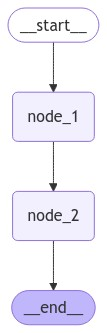

In [ ]:
#view
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"prompt": "rehan"})

---Node 1 State--- {'prompt': 'rehan'}
---Node 2 State--- {'prompt': 'rehan I am'}


{'prompt': 'rehan I am happy!'}

==============================================================================


***adding chat model in langchain.***

In [1]:
!pip install -q -U langchain

!pip install -q -U langchain_google_genai langchain_core langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.7/409.7 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
google_api_key = userdata.get('GOOGLE_API_KEY')

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model='gemini-1.5-flash',
    api_key=google_api_key,
)

In [5]:
from langchain_core.messages import HumanMessage, AIMessage

ai_message : AIMessage = llm.invoke("hello")
print(ai_message.content)

Hello there! How can I help you today?



In [6]:
from typing_extensions import TypedDict

class FirstLLMAgentCall(TypedDict):
  prompt:str
  output:str

In [7]:
def node_1(state: FirstLLMAgentCall):
  print("--Node1--", state)
  prompt= state["prompt"]
  ai_message : AIMessage = llm.invoke(prompt)
  return{'output': ai_message.content}

In [8]:
greet_message = node_1(FirstLLMAgentCall(prompt="hello "))
print(greet_message)

--Node1-- {'prompt': 'hello '}
{'output': 'Hello there! How can I help you today?\n'}


In [12]:
from IPython.display import Image, display
from langgraph.graph.state import CompiledStateGraph
from langgraph.graph import StateGraph, START, END

#build graph
builder: StateGraph = StateGraph(state_schema=FirstLLMAgentCall)

#define noodes
builder.add_node("node_1", node_1)

#add edges
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END )

#compile graph
graph: CompiledStateGraph = builder.compile()

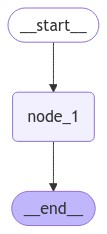

In [13]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
result = graph.invoke(FirstLLMAgentCall({"prompt": "what is fiver"}))

--Node1-- {'prompt': 'what is fiver', 'output': None}


In [17]:
print(result)

{'prompt': 'what is fiver', 'output': 'Fiverr is a global online marketplace for freelance services.  People (sellers) offer their services, and other people (buyers) can purchase these services.  Services offered range from graphic design and writing to video editing, programming, and marketing.  The name "Fiverr" originally came from the fact that services were initially offered for $5, but now services are offered at a wide range of prices.\n'}


In [18]:
# another helper function
import textwrap
from IPython.display import display, Markdown

def to_markdown(text)->Markdown:
  text : str = text.replace("*", "\\*")
  return Markdown(textwrap.indent(text, ">" , predicate=lambda _: True))


In [20]:
print("PROMPT:", result['prompt'])
to_markdown(result['output'])

PROMPT: what is fiver


>Fiverr is a global online marketplace for freelance services.  People (sellers) offer their services, and other people (buyers) can purchase these services.  Services offered range from graphic design and writing to video editing, programming, and marketing.  The name "Fiverr" originally came from the fact that services were initially offered for $5, but now services are offered at a wide range of prices.
